#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_json('/content/drive/MyDrive/Cursos/Programacion/Alura Latam/Data Science/Challenge 2/TelecomX_Data.json')

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Conociendo el conjunto de datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Separando los diccionarios en columnas

In [ ]:
columnas_diccionario = ['customer', 'phone', 'internet', 'account']
for columna in columnas_diccionario:
  datos_normalizados = pd.json_normalize(datos[columna])
  datos= pd.concat([datos,datos_normalizados],axis=1)

datos= datos.drop(columns=columnas_diccionario)

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos= datos.drop(columns=['customerID','PaperlessBilling'])
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.4


## Comprobación de incoherencias en los datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [ ]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
5565,No,Male,0,No,No,54,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic),87.10,4735.2
969,No,Female,1,Yes,No,54,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Electronic check,99.10,5437.1
2139,Yes,Female,1,Yes,No,40,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Credit card (automatic),99.20,4062.2
5933,No,Male,0,Yes,Yes,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),111.80,5443.65
3131,No,Male,0,Yes,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Bank transfer (automatic),19.55,161.15


In [ ]:
import numpy as np

In [ ]:
datos['Charges.Monthly'] = datos['Charges.Monthly'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [ ]:
datos['Charges.Total'] = datos['Charges.Total'].apply(lambda x: x.replace(',','.').strip())

In [ ]:
datos['Charges.Total'] = datos['Charges.Total'].replace('', np.nan)

In [ ]:
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)

In [ ]:
datos.dropna(subset=['Charges.Total'], inplace=True)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaymentMethod     7256 non-null   object 
 17  

In [ ]:
# Verificar porcentaje de valores nulos por columna
null_analysis = datos.isnull().sum() / len(datos) * 100
print(null_analysis[null_analysis > 0].sort_values(ascending=False))

Series([], dtype: float64)


In [ ]:
print(datos[datos.isnull().any(axis=1)])

Empty DataFrame
Columns: [Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []


In [ ]:
datos.query('Churn != "Yes" and Churn!="No"')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
30,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Bank transfer (automatic),79.00,929.30
75,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),19.90,1355.10
96,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Electronic check,58.75,1696.20
98,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Credit card (automatic),59.90,287.85
175,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Mailed check,54.25,773.20
7180,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Bank transfer (automatic),40.65,2070.75
7211,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,76.25,684.85
7239,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),19.25,1372.90


In [ ]:
datos['Churn'] = datos['Churn'].replace('', np.nan)

In [ ]:
datos.dropna(subset=['Churn'], inplace=True)

In [ ]:
datos = datos.replace('',np.nan)
datos.dropna(inplace=True)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
datos.sample(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
4409,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Bank transfer (automatic),97.20,5129.45
1477,No,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),115.55,8312.40
688,No,Female,0,Yes,No,26,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Credit card (automatic),90.10,2312.55
277,Yes,Female,0,No,No,37,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),101.90,3545.35
2383,No,Male,0,Yes,Yes,71,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Bank transfer (automatic),104.65,7288.40
3389,Yes,Male,0,No,No,31,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Electronic check,55.25,1715.65
3527,No,Male,0,No,No,13,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Credit card (automatic),73.75,956.65
6430,Yes,Male,0,Yes,Yes,3,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,56.15,168.15
4201,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,19.40,19.40
464,No,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Credit card (automatic),19.00,105.50


Creando columna de cargos diarios 'Charges.Daily'

In [ ]:
datos['Charges.Daily'] = datos['Charges.Monthly']/30

In [ ]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
1099,Yes,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic),114.20,7723.90,3.806667
4671,Yes,Female,0,No,No,48,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),107.40,5121.30,3.580000
6253,No,Female,0,No,Yes,18,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),25.30,454.65,0.843333
3571,Yes,Male,0,No,Yes,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,69.65,220.10,2.321667
1711,Yes,Male,0,Yes,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,101.05,2391.80,3.368333


Reemplazando No = 0, Yes=1, No internet service = 3





In [ ]:
datos = datos.replace('Yes',1).replace('No',0).replace('No internet service', 3)

/tmp/ipython-input-74-1648153752.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.replace('Yes',1).replace('No',0).replace('No internet service', 3)


In [ ]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
5091,0,Male,0,0,0,47,1,0,0,3,3,3,3,3,3,Two year,Bank transfer (automatic),20.45,943.00,0.681667
7084,0,Female,0,0,0,49,1,0,DSL,1,1,1,1,0,0,Two year,Bank transfer (automatic),67.40,3306.85,2.246667
5316,1,Male,0,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check,69.65,69.65,2.321667
2275,0,Female,0,1,1,71,1,0,0,3,3,3,3,3,3,Two year,Credit card (automatic),19.70,1415.85,0.656667
4826,0,Female,0,1,0,24,1,0,DSL,0,1,0,0,1,1,Month-to-month,Bank transfer (automatic),69.45,1614.05,2.315000


#📊 Carga y análisis

In [ ]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.935011,0.993316,0.992321,0.938567,1.032850,1.036832,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,1.165284,1.141820,1.142250,1.163950,1.123912,1.122016,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,118.750000,8684.800000,3.958333


Graficar porcentajes de bajas en comparacion de los activos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
porcentaje_bajas = (np.sum(datos['Churn'])/(len(datos['Churn'])))*100
porcentaje_bajas

np.float64(26.578498293515356)

In [ ]:
porcentaje_activos = 100-(np.sum(datos['Churn'])/(len(datos['Churn'])))*100
porcentaje_activos

np.float64(73.42150170648465)

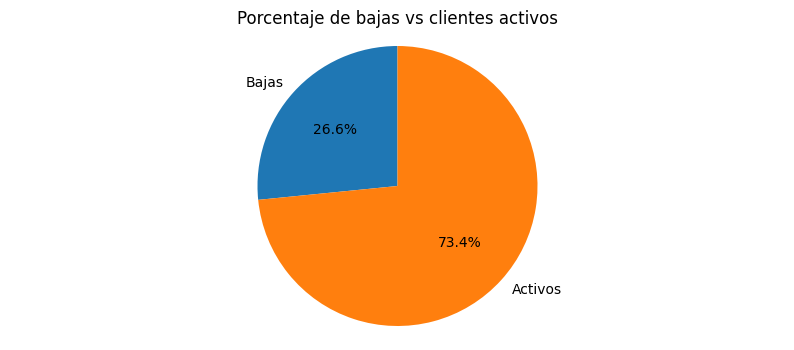

In [ ]:
fig, ax = plt.subplots(figsize= (10,4))

ax.pie([porcentaje_bajas,porcentaje_activos],labels=['Bajas', 'Activos'], autopct='%1.1f%%', startangle=90)
ax.set_title('Porcentaje de bajas vs clientes activos')
ax.axis('equal')
plt.show()

El 26.6% de los clientes se dieron de baja, mientras que el 73.4% permanecieron activos

##Evasion por categorias
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
pd.

#📄Informe final